In [1]:
import os, sys
import numpy as np
import pandas as pd
from scipy.linalg import subspace_angles

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Functions to evaluate subspace angles

In [2]:
'''
Function to compute eigenvalues/singular values of coupling matrix and plot
'''
def get_and_plot_eval_cpl_mat(rec_mat, fig_savename = None):
    
    if rec_mat.shape[0] == rec_mat.shape[1]:
        u, w, vh = np.linalg.svd(rec_mat, full_matrices=True)
    else:
        u, w, vh = np.linalg.svd(rec_mat, full_matrices=True)
    
    return u, w, vh
    
def calc_num_sig_for_given_energy(svd_diag_mat, energy_frac):
    erg = np.cumsum(svd_diag_mat)/np.sum(svd_diag_mat)
    num_sig = np.argmin(np.abs(erg-energy_frac))
    return num_sig

def calc_trunc_rec_mat_from_svd_new(rec_mat,energy_frac=None, num_sig = None):
    u,w,vh = get_and_plot_eval_cpl_mat(rec_mat)
    if num_sig is None:
        num_sig = calc_num_sig_for_given_energy(w, energy_frac)
    elif num_sig == 0.5:
        num_sig = int(w.shape[0]/2)
    else:
        num_sig = num_sig
        
    trunc_rec_mat = np.matmul(u[:,:num_sig]*w[:num_sig],vh[:num_sig,:])
    
    return u,w,vh,trunc_rec_mat, num_sig

def get_ang_list_sing_vec_mat(vmat, rmat):
    ang_list = []
    for ind in range(np.amin([100,vmat.shape[0]-1])):
        tmp_ang = subspace_angles(vmat[ind,:].reshape(vmat[ind,:].shape[0],-1),rmat)
        if len(tmp_ang)>0:
            ang_list = ang_list + [np.rad2deg(tmp_ang[0])]
        else:
            ang_list = ang_list + [np.nan]
             
    return ang_list

In [3]:
def get_subspace_angle_list(rec_mat1, rec_mat2):
    
    nsig = 10 # DEFAULT HARD-CODED
    
    u1, w1, v1, rec_mat1_trunc,n1 = calc_trunc_rec_mat_from_svd_new(rec_mat1, num_sig = nsig)
    u2, w2, v2, rec_mat2_trunc,n2 = calc_trunc_rec_mat_from_svd_new(rec_mat2, num_sig = nsig)

    a1_list = get_ang_list_sing_vec_mat(v1, rec_mat2_trunc.T)
    a2_list = get_ang_list_sing_vec_mat(v2, rec_mat1_trunc.T)
    
    ang_meth1 = np.mean(np.array([a1_list,a2_list]),axis=0) # Mean of both angle lists element-wise
    ang_meth3 = np.rad2deg(subspace_angles(rec_mat1_trunc.T, rec_mat2_trunc.T))
    
    return ang_meth1, ang_meth3

### Generate two random interaction matrices

In [4]:
rec_mat1 = np.random.rand(60,60)
rec_mat2 = np.random.rand(40,60)

### Plot the two interaction matrices

In [5]:
def make_subplot_cbar(im, ax, lbl_sz = 20):
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = plt.colorbar(im, cax=cax, orientation='vertical')#,ticks = cb_tks,format='$%.4f$')#,format=formatter)
    cbar.ax.tick_params(labelsize = lbl_sz)
    cbar.minorticks_off()
    cbar.config_axis()
    
    return cbar

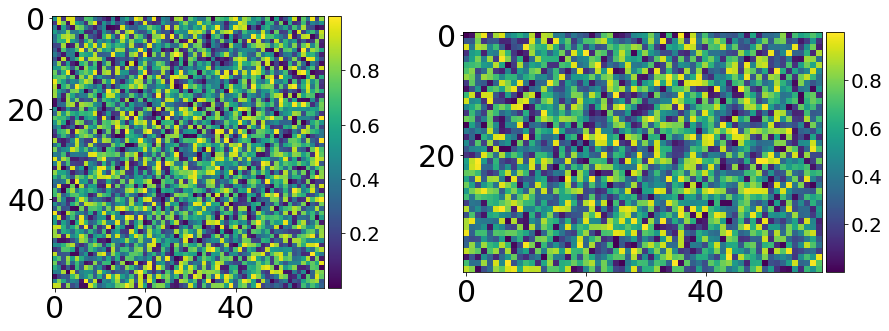

In [6]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

im0 = ax[0].imshow(rec_mat1)
make_subplot_cbar(im0,ax[0])

im1 = ax[1].imshow(rec_mat2)
make_subplot_cbar(im1,ax[1])

plt.show()

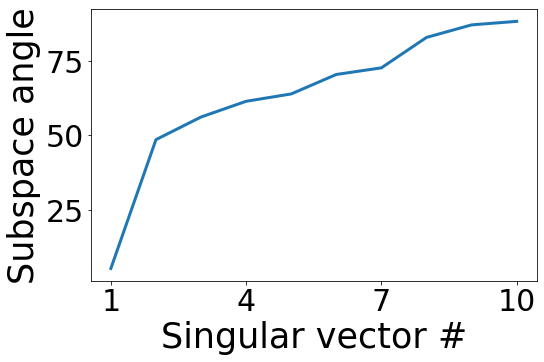

In [7]:
ang_meth1, ang_meth3 = get_subspace_angle_list(rec_mat1, rec_mat2)

fig,ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(ang_meth3[::-1], linewidth=3.0)
ax.set_xticks(range(0,10,3))
ax.set_xticklabels(range(1,11,3))

ax.set_xlabel('Singular vector #')
ax.set_ylabel('Subspace angle')
plt.show()